# Implementing ANN from Scratch On MNIST Dataset

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return x>0

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    
def one_hot(Y):
    return np.eye(Y.max() + 1)[Y]

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

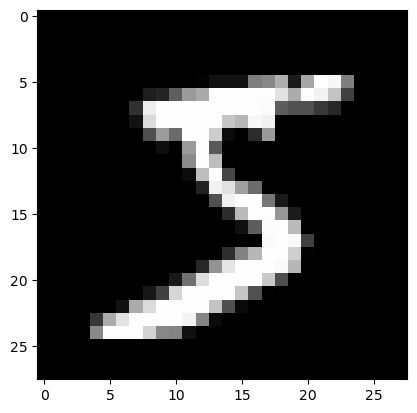

In [4]:
plt.imshow(X_train[0],cmap = 'gray')

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
y_train = one_hot(y_train)
y_test = one_hot(y_test)

In [8]:
input_size = 784
hidden_size = 64
output_size = 10

Wxh = np.random.rand(input_size, hidden_size) - 0.5
Why = np.random.rand(hidden_size, output_size) - 0.5
bh = np.random.rand(1, hidden_size) - 0.5
by = np.random.rand(1, output_size) - 0.5

In [9]:
def forward_prop(X,Wxh,bh,Why,by):
    zi = np.dot(X,Wxh) + bh
    ai = relu(zi)
    zo = np.dot(ai,Why) + by
    yo = softmax(zo)
    return yo, zi, ai, zo

In [10]:
def backward_prop(X,y,zi,ai,zo,yo,Wxh,Why):
    m = X.shape[0]
    delta2 = yo - y
    
    dJ_dWhy = np.dot(ai.T, delta2) / m
    dJ_dby = np.sum(delta2, axis=0, keepdims=True) / m
    
    delta1 = np.dot(delta2, Why.T) * relu_derivative(zi)
    
    dJ_dWxh = np.dot(X.T, delta1) / m
    dJ_dbh = np.sum(delta1, axis=0, keepdims=True) / m
    return dJ_dWxh, dJ_dWhy, dJ_dbh, dJ_dby

In [11]:
alpha = 0.1
epochs = 100
cost = []

for epoch in range(epochs):
    yo, zi, ai, zo = forward_prop(X_train,Wxh,bh,Why,by)
    dJ_dWxh, dJ_dWhy, dJ_dbh, dJ_dby = backward_prop(X_train,y_train,zi,ai,zo,yo,Wxh,Why)

    Wxh -= alpha * dJ_dWxh
    bh -= alpha * dJ_dbh
    Why -= alpha * dJ_dWhy
    by -= alpha * dJ_dby

    loss = -np.sum(y_train * np.log(yo + 1e-8)) / y_train.shape[0]
    cost.append(loss)
    y_pred = np.argmax(yo, axis=1)
    y = np.argmax(y_train, axis=1)
    accuracy = np.mean(y_pred == y) * 100

    print(f"Epoch {epoch + 1}, Loss: {loss:.3f}, Accuracy: {accuracy:.2f}%")

Epoch 1, Loss: 5.219, Accuracy: 12.71%
Epoch 2, Loss: 4.118, Accuracy: 11.90%
Epoch 3, Loss: 3.551, Accuracy: 17.19%
Epoch 4, Loss: 3.214, Accuracy: 21.22%
Epoch 5, Loss: 2.942, Accuracy: 24.75%
Epoch 6, Loss: 2.715, Accuracy: 28.16%
Epoch 7, Loss: 2.523, Accuracy: 31.15%
Epoch 8, Loss: 2.359, Accuracy: 33.99%
Epoch 9, Loss: 2.217, Accuracy: 36.66%
Epoch 10, Loss: 2.093, Accuracy: 39.12%
Epoch 11, Loss: 1.985, Accuracy: 41.41%
Epoch 12, Loss: 1.890, Accuracy: 43.58%
Epoch 13, Loss: 1.805, Accuracy: 45.54%
Epoch 14, Loss: 1.730, Accuracy: 47.37%
Epoch 15, Loss: 1.663, Accuracy: 49.11%
Epoch 16, Loss: 1.602, Accuracy: 50.72%
Epoch 17, Loss: 1.547, Accuracy: 52.16%
Epoch 18, Loss: 1.497, Accuracy: 53.54%
Epoch 19, Loss: 1.451, Accuracy: 54.75%
Epoch 20, Loss: 1.409, Accuracy: 55.93%
Epoch 21, Loss: 1.370, Accuracy: 57.08%
Epoch 22, Loss: 1.334, Accuracy: 58.14%
Epoch 23, Loss: 1.301, Accuracy: 59.17%
Epoch 24, Loss: 1.270, Accuracy: 60.11%
Epoch 25, Loss: 1.241, Accuracy: 60.96%
Epoch 26,

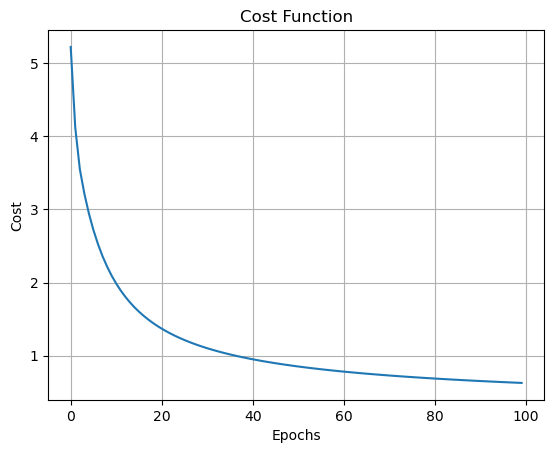

In [12]:
plt.plot(range(epochs), cost)
plt.title('Cost Function')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid()
plt.show()

In [13]:
def predict(X,Wxh,bh,Why,by):
    yo, zi, ai, zo = forward_prop(X,Wxh,bh,Why,by)
    return np.argmax(yo, axis=1)

In [14]:
predict(X_test[0],Wxh,bh,Why,by)

array([7])

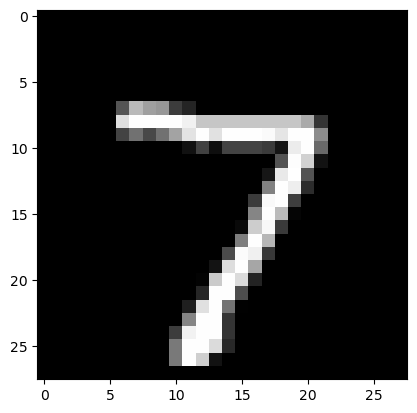

In [15]:
plt.imshow(X_test[0].reshape(28,28),cmap = 'gray')